# Regression

## Predicting car prices

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
df=pd.read_excel('cars.xlsx')

## Exploratory Data Analysis

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.sample(5)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
340,46732.606030,3625,Chevrolet,Corvette,Conv 2D,Convertible,8,6.0,2,1,1,1
310,14997.884336,8880,Chevrolet,Cobalt,LS Sedan 4D,Sedan,4,2.2,4,0,1,1
29,19556.899320,25245,Buick,Lacrosse,CXL Sedan 4D,Sedan,6,3.6,4,1,0,0
256,13141.047950,19898,Chevrolet,Cavalier,LS Sport Coupe 2D,Coupe,4,2.2,2,1,1,1
279,10546.782745,38866,Chevrolet,Cavalier,Sedan 4D,Sedan,4,2.2,4,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
#statistics
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
#correlation
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [8]:
#P-value p<0.05 there is correlation, p-value>0.05 no correlation

In [9]:
df.shape

(804, 12)

In [10]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [11]:
df.Make.value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [12]:
df['Make'].value_counts(normalize=True)

Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: Make, dtype: float64

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='Make', ylabel='count'>

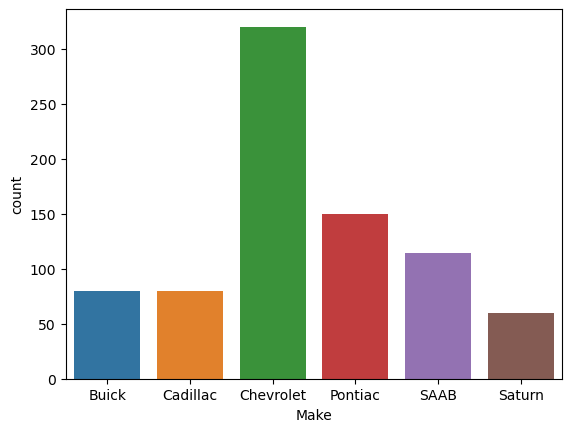

In [14]:
sns.countplot(x=df['Make'])

[Text(0, 0, '80'),
 Text(0, 0, '80'),
 Text(0, 0, '320'),
 Text(0, 0, '150'),
 Text(0, 0, '114'),
 Text(0, 0, '60')]

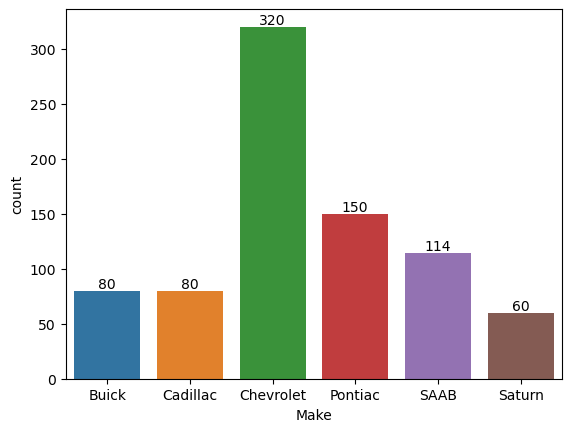

In [15]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0])

[Text(0, 0, '190'), Text(0, 0, '614')]

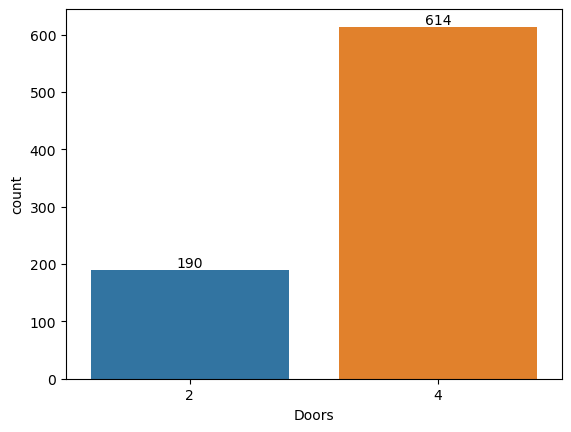

In [16]:
ax=sns.countplot(x=df['Doors'])
ax.bar_label(ax.containers[0])

<AxesSubplot:>

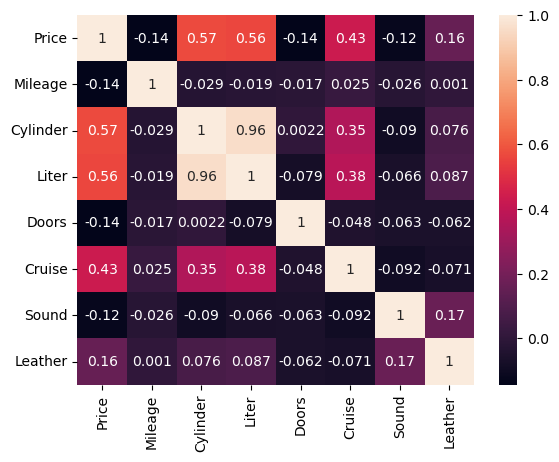

In [17]:
sns.heatmap(df.corr(),annot=True)

In [18]:
abs(df.corr()['Price']).sort_values(ascending=False)

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [19]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

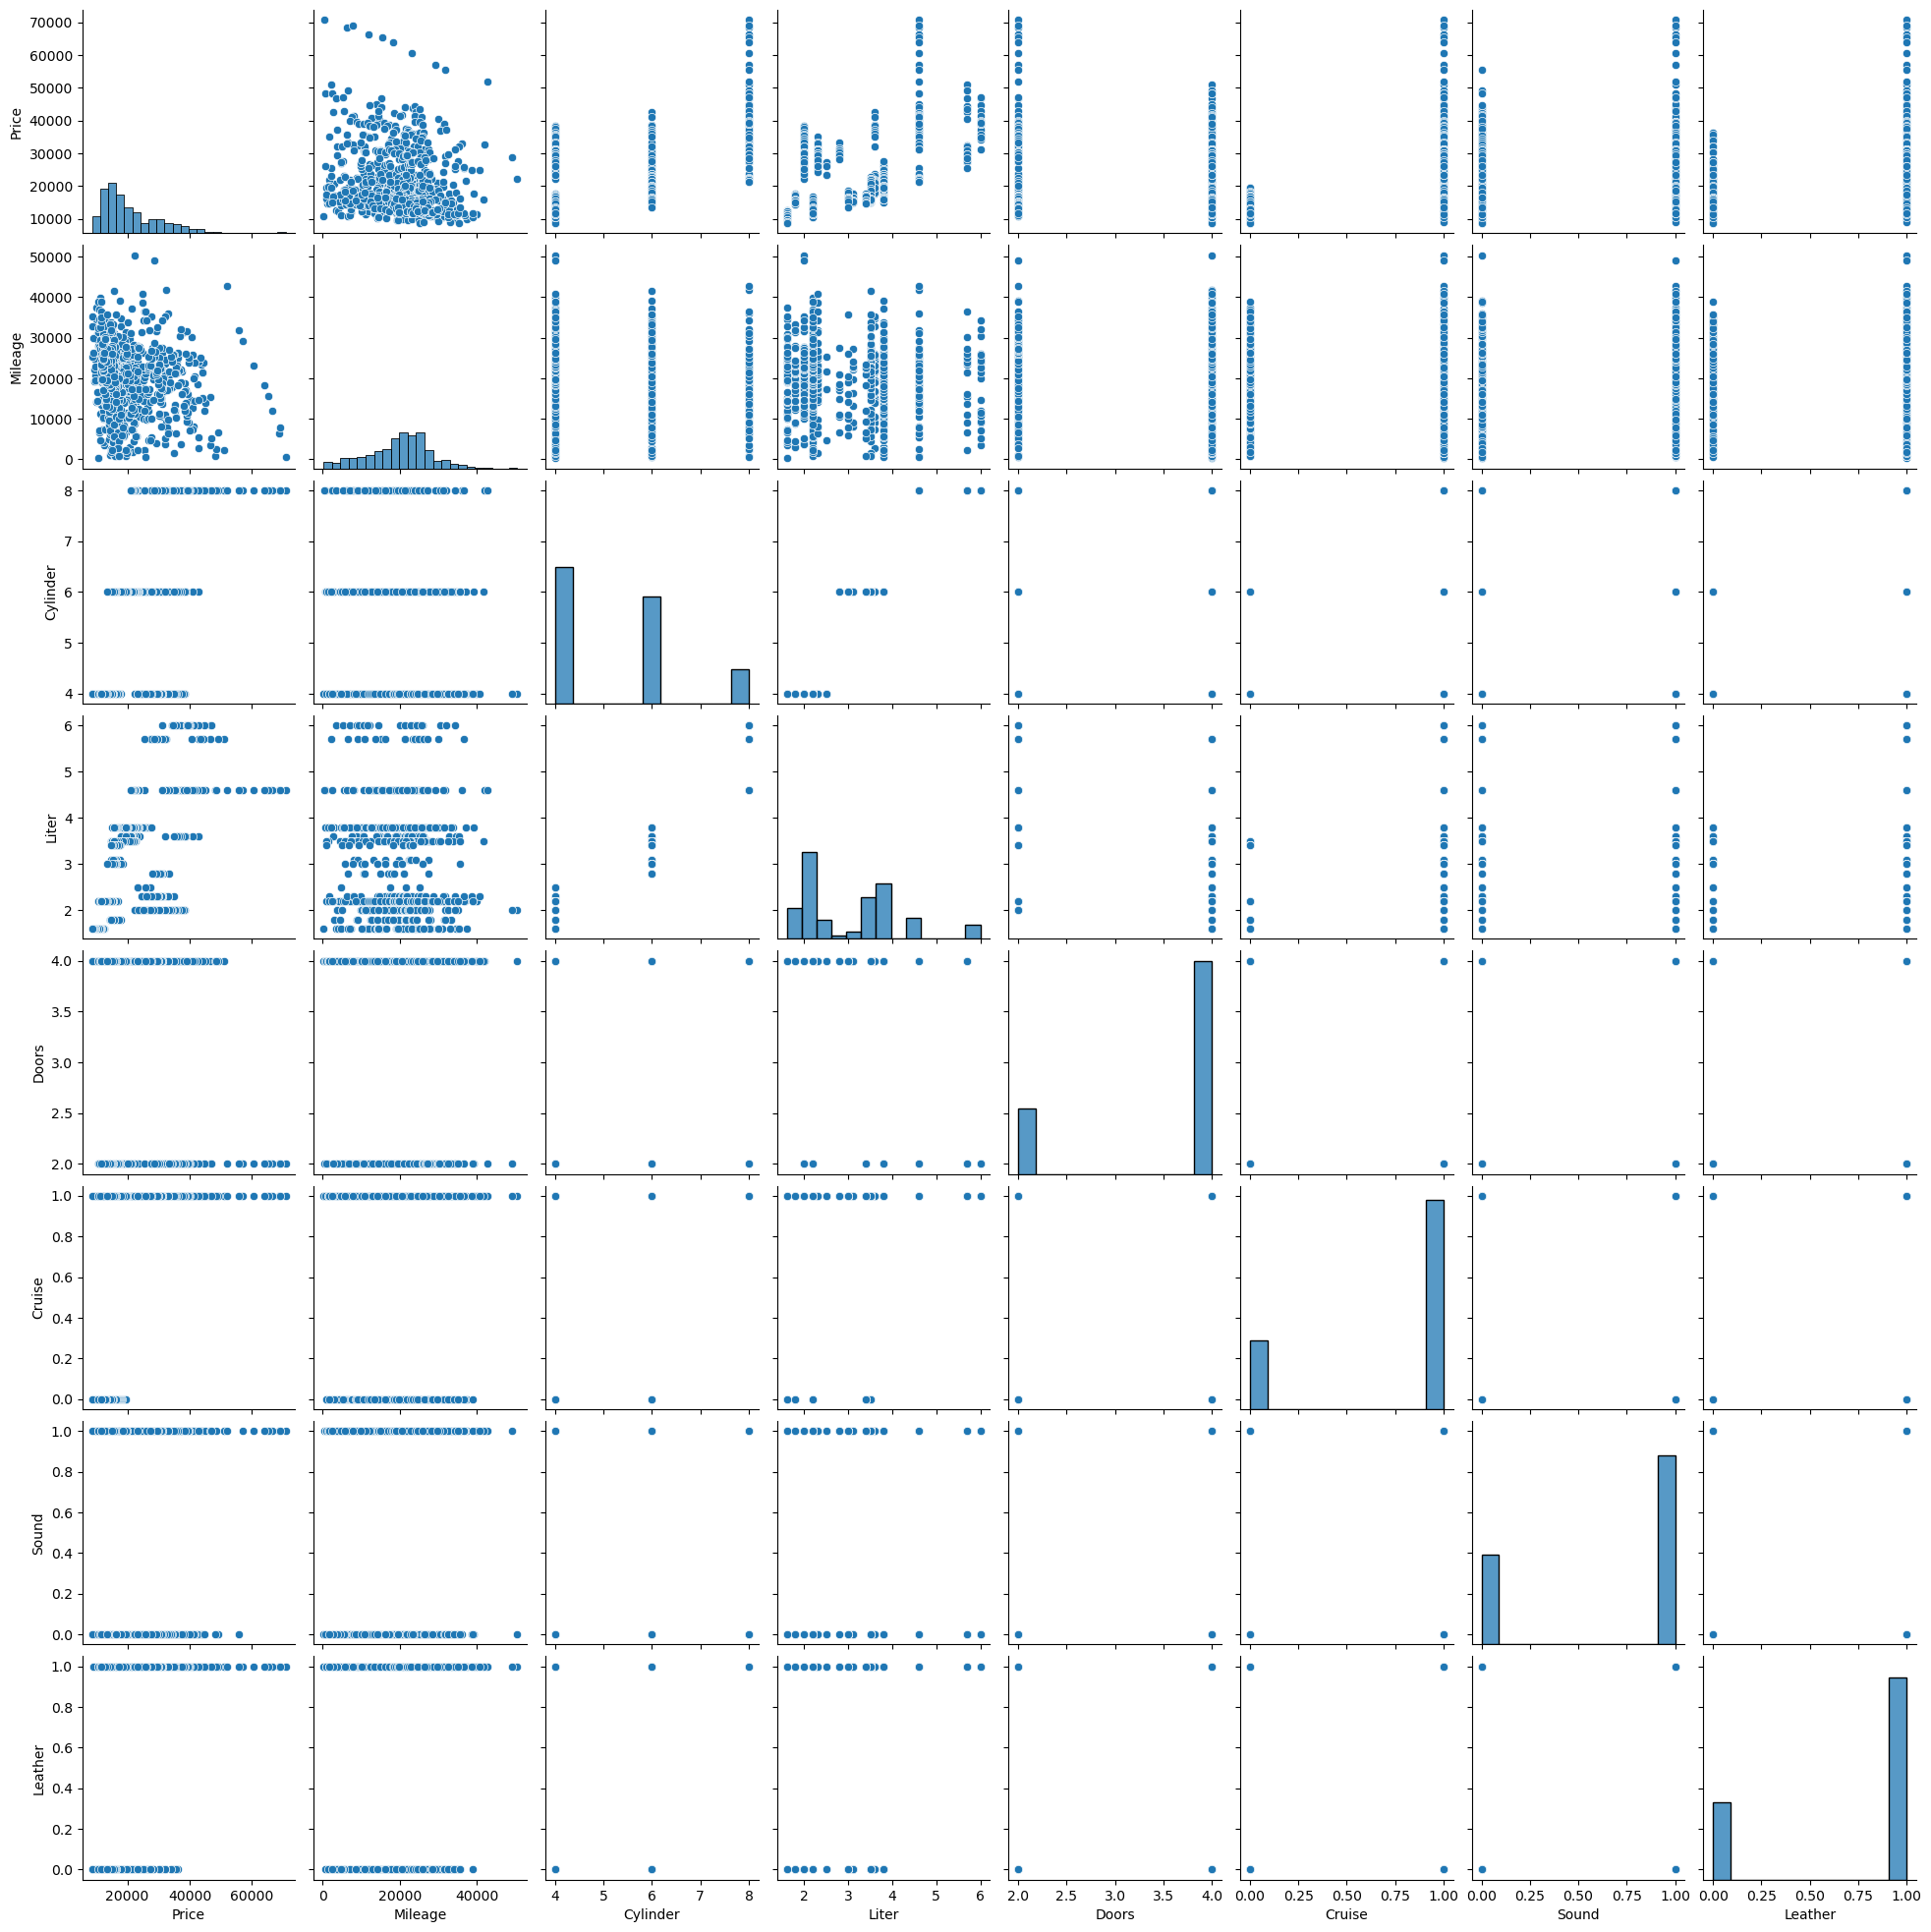

In [20]:
sns.pairplot(df)

# Modelling

In [21]:
abs(df.corr()['Price']).sort_values(ascending=False)
#include columns that correlatio is above 0.20 and below 0.90

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Mileage     0.143051
Doors       0.138750
Sound       0.124348
Name: Price, dtype: float64

In [22]:
x=df[['Mileage','Cylinder','Liter','Cruise']]
y=df[['Price']]

In [23]:
y=df['Price']
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [24]:
y=df[['Price']]
y

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324
...,...
799,16507.070267
800,16175.957604
801,15731.132897
802,15118.893228


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [27]:
X_train.shape

(643, 4)

In [28]:
643/804

0.7997512437810945

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr=LinearRegression()

In [31]:
model=lr.fit(X_train,y_train)

In [32]:
pred=model.predict(X_test)

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
mean_squared_error(y_test, pred)**0.5

7413.255792158802

In [35]:
r2_score(y_test,pred)

0.30711149069980004

In [36]:
#r2_score>0.85 is success what is required( especially in military where lives are at stake)is 99.999%

In [37]:
#Normalizing is increasing our accuracy

In [38]:
x=df[['Mileage','Cylinder','Liter','Cruise','Make','Trim']]
y=df[['Price']]

In [39]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D


In [40]:
x=pd.get_dummies(x,drop_first=True)

In [41]:
x.head()

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [43]:
model=lr.fit(X_train,y_train)

In [44]:
pred=model.predict(X_test)

In [45]:
r2_score(y_test,pred)

0.9707311770106378

In [46]:
from sklearn.linear_model import Ridge, Lasso

In [47]:
R=Ridge()
L=Lasso()

In [48]:
R.fit(X_train,y_train)

Ridge()

In [49]:
pred2=R.predict(X_test)

In [50]:
r2_score(y_test,pred2)

0.9686973810318731

In [51]:
L.fit(X_train,y_train)

Lasso()

In [52]:
pred3=L.predict(X_test)

In [53]:
r2_score(y_test,pred3)

0.9705999564419019

In [54]:
from sklearn.neighbors import KNeighborsRegressor

In [55]:
knn=KNeighborsRegressor()

In [56]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [57]:
pred4=knn.predict(X_test)

In [58]:
r2_score(y_test,pred4)

-0.15677137098854232

In [59]:
def sq(list):
    return list**2

In [60]:
l=[2,3,4,5]

for i in l:
    print(sq(i))

4
9
16
25


In [62]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [64]:
#DRY=Don't Repeat Yourself
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [65]:
algo_test(x,y)

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,R_Squared,RMSE,MAE
XGradientBooting,0.989086,1135.588984,738.307347
Gradient Boosting,0.984147,1368.618209,947.147900
Extra Tree,0.977908,1615.667875,868.336152
Linear,0.970979,1851.760413,1216.727712
Ridge,0.970092,1879.849700,1252.921665
Lasso,0.969435,1900.373866,1234.063969
ElasticNet,0.577008,7069.627849,5063.117226
